In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import re
from numpy import nan
sns.mpl.rcParams['axes.formatter.useoffset'] = False
sns.set_style('whitegrid')
%matplotlib inline

root = '../calc/2017-03-24-benzene-dimer-qe-tests/'
import sys
sys.path.append(root)
import caf
from caflib.Cellar import Cellar
from caflib.Utils import slugify

kcal = 627.503

def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i+n]

def savefig(name):
    sns.plt.savefig('../media/' + name, transparent=True)

In [2]:
cellar = Cellar(f'{root}/.caf')
tree = cellar.get_tree(objects=True)

In [3]:
def get_seconds(time):
    time = re.split('([smh])', time)[:-1]
    return sum(float(num)*{'s': 1, 'm': 60, 'h': 3600}[unit] for num, unit in chunks(time, 2))

In [4]:
data = []
for hashid, path in tree.glob('**'):
    if 'outputs' not in tree.objects[hashid]:
        continue
    _, *keys = path.split('/')
    filehash = tree.objects[hashid]['outputs']['run.out']
    with open(cellar.get_file(filehash)) as f:
        line = next(l for l in f if l[0] == '!')
        ene = float(line.split()[4])*kcal/2  # from Ry
        line = next(l for l in f if 'PWSCF        :' in l)
        time = get_seconds(re.search(r'CPU +(\S.*) WALL', line).group(1))
    data.append((*keys, ene, time))
data = pd.DataFrame.from_records(
    data,
    columns='padding basis pseudo xc system ene time'.split()
).set_index('padding basis pseudo xc system'.split(), verify_integrity=True).sort_index()

(-5, -4.2)

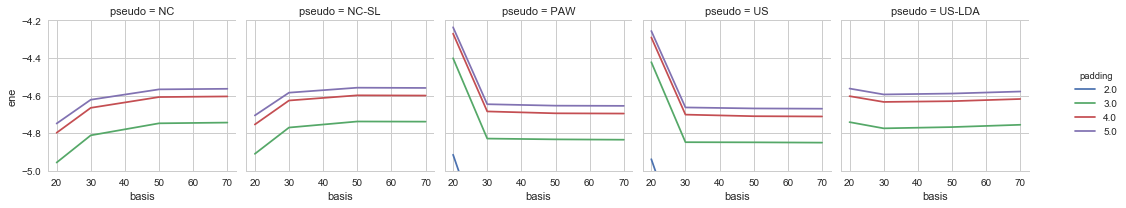

In [5]:
data_int = data['ene'] \
    .unstack().apply(lambda r: r['complex']-r['frag-1']-r['frag-2'], axis=1) \
    .unstack().apply(lambda r: r['vv10']-r['base'], axis=1) \
    .to_frame('ene')
    
sns.FacetGrid(
    data=data_int.reset_index(),
    hue='padding',
    col='pseudo',
    margin_titles=True,
).map(sns.plt.plot, 'basis', 'ene').add_legend()
sns.plt.ylim(-5, -4.2)

(-5, -4.2)

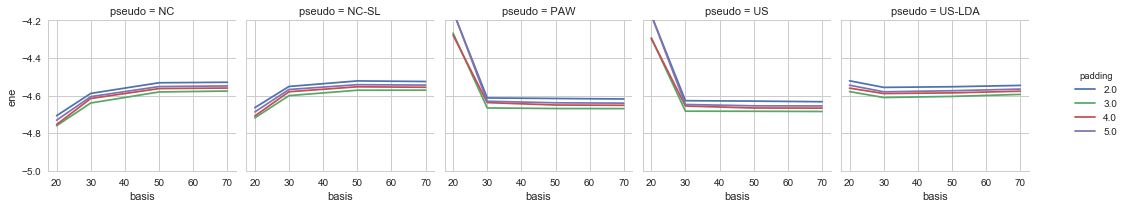

In [6]:
data_int = data['ene'] \
    .unstack().apply(lambda r: r['complex']-r['frag-1a']-r['frag-2a'], axis=1) \
    .unstack().apply(lambda r: r['vv10']-r['base'], axis=1) \
    .to_frame('ene')
    
sns.FacetGrid(
    data=data_int.reset_index(),
    hue='padding',
    col='pseudo',
    margin_titles=True,
).map(sns.plt.plot, 'basis', 'ene').add_legend()
sns.plt.ylim(-5, -4.2)

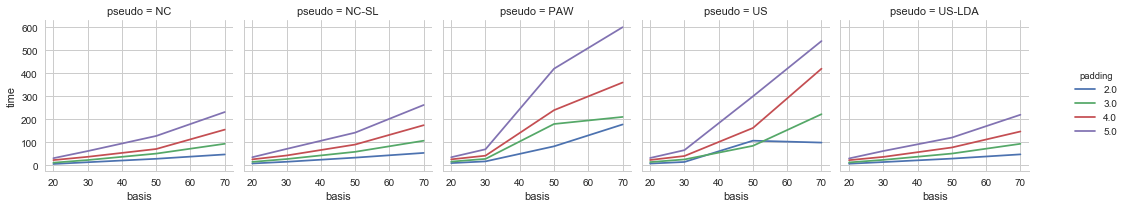

In [7]:
sns.FacetGrid(
    data=data.loc[
        (slice(None), slice(None), slice(None), 'vv10', 'complex'),
        ['time']
    ].reset_index(),
    hue='padding',
    col='pseudo',
    margin_titles=True,
).map(sns.plt.plot, 'basis', 'time').add_legend()

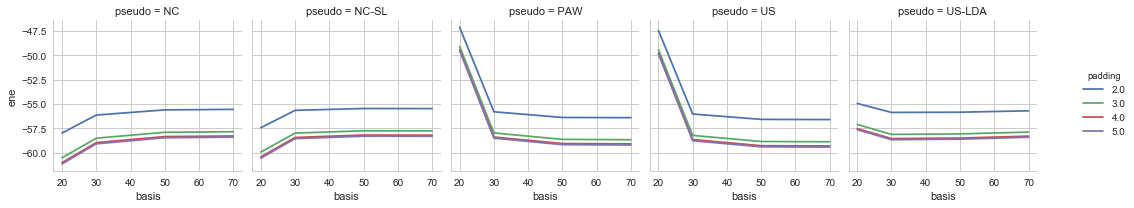

In [8]:
data_int = data['ene'] \
    .unstack().apply(lambda r: r['crystal']-4*r['molecule'], axis=1) \
    .unstack().apply(lambda r: r['vv10']-r['base'], axis=1) \
    .to_frame('ene')
    
sns.FacetGrid(
    data=data_int.reset_index(),
    hue='padding',
    col='pseudo',
    margin_titles=True,
).map(sns.plt.plot, 'basis', 'ene').add_legend()

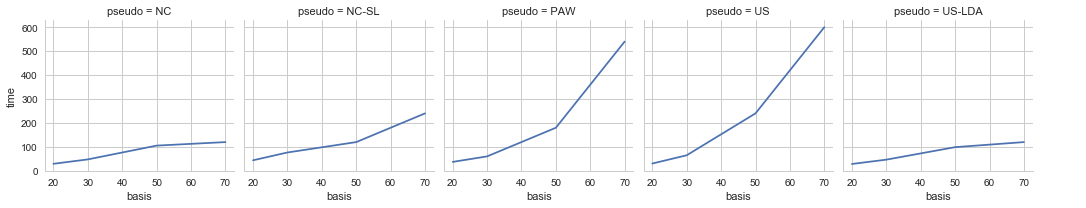

In [9]:
sns.FacetGrid(
    data=data.loc[
        ('2.0', slice(None), slice(None), 'vv10', 'crystal'),
        ['time']
    ].reset_index(),
    col='pseudo',
    margin_titles=True,
).map(sns.plt.plot, 'basis', 'time').add_legend()